### Summary
<p>
Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the Star Wars movies?
FiveThirtyEight collected data addressing this question. To do this, they surveyed Star Wars fans using the 
online tool SurveyMonkey.  They received 835 total responses stored on their <a href ="https://github.com/fivethirtyeight/data/tree/master/star-wars-survey", target="_blank"> GitHub repository.</a>
</p>

### Import packages

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import data set

In [81]:
star_wars = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv", 
                        encoding="ISO-8859-1")

In [82]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [83]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [84]:
star_wars.shape

(1187, 38)

### Cleaning the star wars data set

In [85]:
# star_wars.info()

In [86]:
star_wars.isnull().sum()[0:8]

RespondentID                                                                             1
Have you seen any of the 6 films in the Star Wars franchise?                             0
Do you consider yourself to be a fan of the Star Wars film franchise?                  350
Which of the following Star Wars films have you seen? Please select all that apply.    513
Unnamed: 4                                                                             615
Unnamed: 5                                                                             636
Unnamed: 6                                                                             579
Unnamed: 7                                                                             428
dtype: int64

In [87]:
resp_notnull = pd.notnull(star_wars['RespondentID'])

In [88]:
star_wars = star_wars[resp_notnull].copy()


In [89]:
star_wars["RespondentID"].isnull().sum()

0

In [90]:
star_wars.shape

(1186, 38)

There was one null value. This one null value is removed.

Explore unique values

In [91]:
# This column has got 0 nan-values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [92]:
# This column has got 350 nan-values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Replace the string Yes and No with boolean True and False, because booleans are easier to work with 
because they can be selected without having to do a string comparison.

In [93]:
# pandas.Series.map() 
yes_no_dict = {"Yes":True,
               "No":False}



In [94]:
star_wars_map_1 =(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].
            map(yes_no_dict))

In [95]:
# Check
star_wars_map_1.head()

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [96]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars_map_1

In [97]:
# Check
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].head()

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [98]:
star_wars_map_2 = star_wars.iloc[:,2].map(yes_no_dict)

In [99]:
star_wars_map_2.head()

1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [100]:
star_wars.iloc[:,2] = star_wars_map_2

In [101]:
# Check
star_wars.iloc[:,2].head()

1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [102]:
# Check
star_wars.iloc[0:3,0:3]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False


Changing values (movie title) with boolean True or False and renaming the column names, because 
these are convoluted.

In [103]:
star_wars["Unnamed: 4"].unique()

array(['Star Wars: Episode II  Attack of the Clones', nan], dtype=object)

Problem solving:
What do I need to change values in a column with pd.series.map?
A dictionary mapping existing values with new values.
Do I need a for loop to change multiple columns at once?
Work from a small step at first.
Test the solution on a series instead of mutltiple columns.

In [104]:
dict_34 = {'Star Wars: Episode II  Attack of the Clones': True, np.NaN: False}
dict_34

{'Star Wars: Episode II  Attack of the Clones': True, nan: False}

In [105]:
unnamed_34 = star_wars["Unnamed: 4"].copy()
unnamed_34.head()

1    Star Wars: Episode II  Attack of the Clones
2                                            NaN
3    Star Wars: Episode II  Attack of the Clones
4    Star Wars: Episode II  Attack of the Clones
5    Star Wars: Episode II  Attack of the Clones
Name: Unnamed: 4, dtype: object

In [106]:
unnamed_55 = unnamed_34.map(dict_34)
unnamed_55.unique()

array([ True, False], dtype=bool)

In [107]:
unnamed_55.head()

1     True
2    False
3     True
4     True
5     True
Name: Unnamed: 4, dtype: bool

Now I want to the same for multiple columns. What do I need for this? The first heuristic, which comes into
mind, is for loop over the columns (= pd.Series), whereby map is used to change the values. (The second thought
is then a list comprehension.)

In [108]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [109]:
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [110]:
for i in star_wars.iloc[:,3:9].columns:
    print(star_wars[i].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [111]:
dict_88 = { np.NaN: False,
           'Star Wars: Episode I  The Phantom Menace': True,
           'Star Wars: Episode II  Attack of the Clones': True,
           'Star Wars: Episode III  Revenge of the Sith': True,
           'Star Wars: Episode IV  A New Hope': True,
           'Star Wars: Episode V The Empire Strikes Back': True,
           'Star Wars: Episode VI Return of the Jedi': True,
           }
dict_88

{nan: False,
 'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True}

In [112]:
for x in star_wars.columns[3:9]:
    star_wars[x] = star_wars[x].map(dict_88)

In [113]:
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [114]:

columns_256 = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
               'Unnamed: 4': "seen2" , 'Unnamed: 5': "seen3" , 'Unnamed: 6': "seen4" , 'Unnamed: 7': "seen5" ,
               'Unnamed: 8': "seen6"}

columns_256 

{'Unnamed: 4': 'seen2',
 'Unnamed: 5': 'seen3',
 'Unnamed: 6': 'seen4',
 'Unnamed: 7': 'seen5',
 'Unnamed: 8': 'seen6',
 'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1'}

In [115]:
star_wars.rename(columns = columns_256, inplace = True)

In [116]:
star_wars.iloc[:,3:9].head()

,seen1,seen2,seen3,seen4,seen5,seen6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


Ranking columns

In [117]:
star_wars.columns[9:15]


Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [118]:
star_wars.iloc[:,9:15].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [119]:
type(star_wars.iloc[5,9])

str

Convert string to float

In [120]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [121]:
type(star_wars.iloc[5,9])

numpy.float64

In [122]:
dict_222 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking1",
            'Unnamed: 10':"ranking2", 'Unnamed: 11':"ranking3", 'Unnamed: 12':"ranking4", 
            'Unnamed: 13':"ranking5", 'Unnamed: 14':"ranking6"}
dict_222 

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking1',
 'Unnamed: 10': 'ranking2',
 'Unnamed: 11': 'ranking3',
 'Unnamed: 12': 'ranking4',
 'Unnamed: 13': 'ranking5',
 'Unnamed: 14': 'ranking6'}

Chooose easier to understand column names

In [123]:
star_wars.rename(columns=dict_222, inplace=True)

In [124]:
star_wars.columns.values

array(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6', 'ranking1',
       'ranking2', 'ranking3', 'ranking4', 'ranking5', 'ranking6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?\x8cæ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'], dtype=obje

Mean ranking<br>
Lower ranking is better!

In [125]:
ranking_means = star_wars.iloc[:,9:15].mean(axis=0)

In [126]:
ranking_variance = star_wars.iloc[:,9:15].var(axis=0)

In [127]:
type(ranking_means)

pandas.core.series.Series

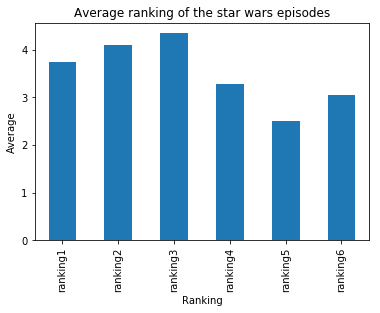

In [128]:
ranking_means.plot(kind="bar")
plt.title("Average ranking of the star wars episodes")
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

'Star Wars: Episode V The Empire Strikes Back' is ranked highest by the audience.

In [129]:
labels23 = list(star_wars.columns[9:15])
labels23

['ranking1', 'ranking2', 'ranking3', 'ranking4', 'ranking5', 'ranking6']

In [130]:
xticks23 = np.arange(1,len(labels23)+1,1)
xticks23

array([1, 2, 3, 4, 5, 6])

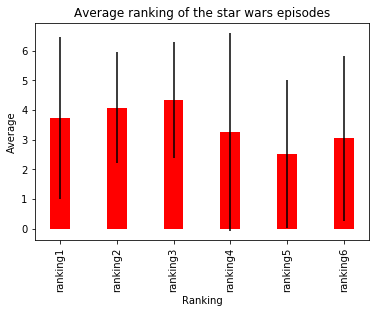

In [131]:
width = 0.35   
plt.bar(xticks23, ranking_means, width, color='r', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes")
plt.xticks(xticks23, labels23, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

How many people haven see the episodes?

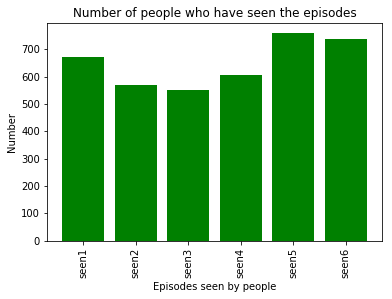

In [132]:
# values
seen_sum = star_wars.iloc[:,3:9].sum()
seen_sum

# xticks
xticks_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_seen

# xtick labels
labels_seen = list(star_wars.columns[3:9])
labels_seen

plt.bar(xticks_seen, seen_sum, color="green")
plt.xticks(xticks_seen, labels_seen, rotation="vertical")
plt.title("Number of people who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

Episode 5 has the highest number of viewers and the highest ranking. This correlation
could be based on recommendations by the viewers to each other resulting in a higher 
number of viewers.

Creating subsets of the data set based on binary columns

Fan or not fan of Star Wars

In [133]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]

In [134]:
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

In [135]:
# values
fan_seen_sum = fan.iloc[:,3:9].sum()
fan_seen_sum

seen1    500
seen2    463
seen3    450
seen4    483
seen5    538
seen6    537
dtype: int64

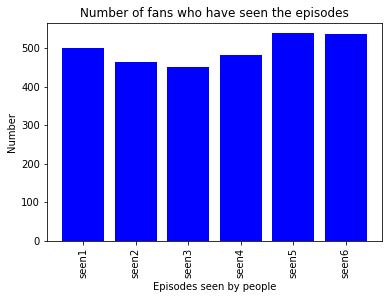

In [136]:
# xticks
xticks_fan_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_fan_seen

# xtick labels
labels_fan_seen = list(fan.columns[3:9])
labels_fan_seen

plt.bar(xticks_fan_seen, fan_seen_sum, color="blue")
plt.xticks(xticks_fan_seen, labels_fan_seen, rotation="vertical")
plt.title("Number of fans who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

In [137]:
# values
not_fan_seen_sum = not_fan.iloc[:,3:9].sum()
not_fan_seen_sum

seen1    173
seen2    108
seen3    100
seen4    124
seen5    220
seen6    201
dtype: int64

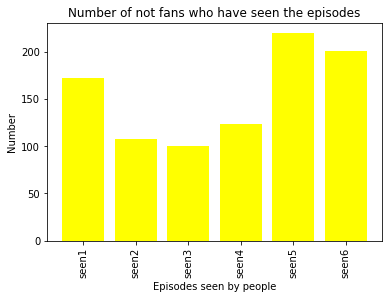

In [138]:
# xticks
xticks_not_fan_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_not_fan_seen

# xtick labels
labels_not_fan_seen = list(not_fan.columns[3:9])
labels_not_fan_seen

plt.bar(xticks_not_fan_seen, not_fan_seen_sum, color="yellow")
plt.xticks(xticks_not_fan_seen, labels_not_fan_seen, rotation="vertical")
plt.title("Number of not fans who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

The number of fans seeing the episodes is more equally distributed whereas the number of non fans have seen 5 and 6
clearly more than the other episodes.

Ranking by fan or not fan

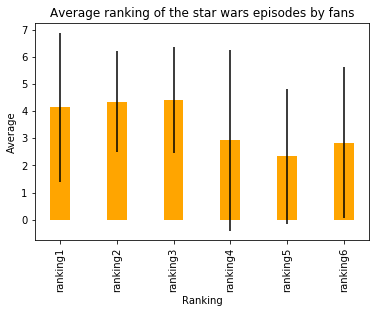

In [139]:
# values
fan_ranking_means = fan.iloc[:,9:15].mean(axis=0)
fan_ranking_variance = fan.iloc[:,9:15].var(axis=0)
# xtick labels
labels23_fan = list(fan.columns[9:15])
labels23_fan
# xticks
xticks23_fan = np.arange(1,len(labels23_fan)+1,1)
# Alternatively
# xticks23_fan = [i + 1 for i,_ in enumerate(seen_sum)]
xticks23_fan
width = 0.35   
plt.bar(xticks23_fan, fan_ranking_means, width, color='orange', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by fans")
plt.xticks(xticks23_fan, labels23_fan, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

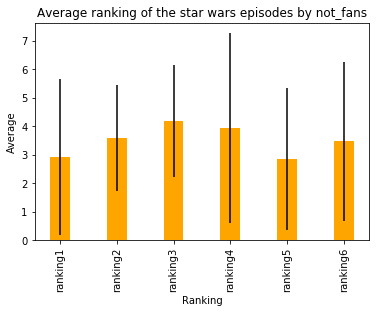

In [140]:
not_fan_ranking_means = not_fan.iloc[:,9:15].mean(axis=0)
not_fan_ranking_variance = not_fan.iloc[:,9:15].var(axis=0)
labels23_not_fan = list(not_fan.columns[9:15])
labels23_not_fan
xticks23_not_fan = np.arange(1,len(labels23_not_fan)+1,1)
xticks23_not_fan
width = 0.35   
plt.bar(xticks23_not_fan, not_fan_ranking_means, width, color='orange', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by not_fans")
plt.xticks(xticks23_not_fan, labels23_not_fan, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

Fans ranked episodes 4, 5 and 6 higher than the new 1, 2, 3 other than non fans, who ranked 2 and 3 as the highest.

Treckie or not treckie?

In [148]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].unique()

array(['No', 'Yes', nan], dtype=object)

In [149]:
treckie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="Yes"]
not_treckie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=="No"]

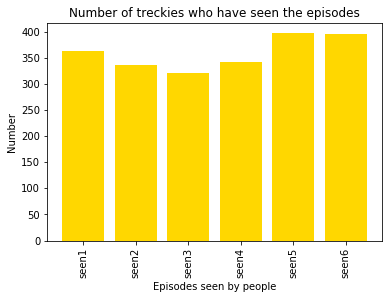

In [151]:
# values
treckie_seen_sum = treckie.iloc[:,3:9].sum()
treckie_seen_sum
# xticks
xticks_treckie_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_treckie_seen

# xtick labels
labels_treckie_seen = list(treckie.columns[3:9])
labels_treckie_seen

plt.bar(xticks_treckie_seen, treckie_seen_sum, color="gold")
plt.xticks(xticks_treckie_seen, labels_treckie_seen, rotation="vertical")
plt.title("Number of treckies who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

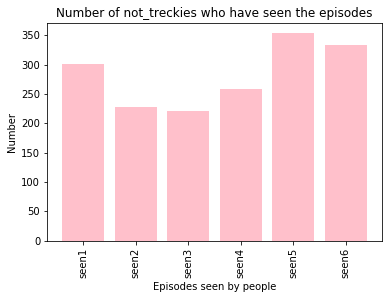

In [152]:
# values
not_treckie_seen_sum = not_treckie.iloc[:,3:9].sum()
not_treckie_seen_sum
# xticks
xticks_not_treckie_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_not_treckie_seen

# xtick labels
labels_not_treckie_seen = list(not_treckie.columns[3:9])
labels_not_treckie_seen

plt.bar(xticks_not_treckie_seen, not_treckie_seen_sum, color="pink")
plt.xticks(xticks_not_treckie_seen, labels_not_treckie_seen, rotation="vertical")
plt.title("Number of not_treckies who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

The number of treckies who watched star wars is highest for 5 and 6, but treckies have seen all episodes 
more equally than non-treckies.

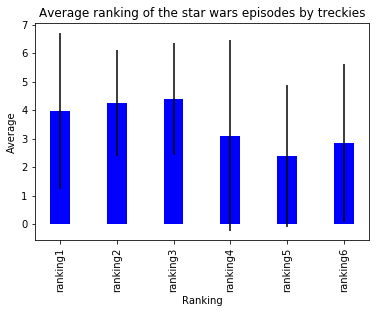

In [158]:
treckie_ranking_means = treckie.iloc[:,9:15].mean(axis=0)
treckie_ranking_variance = treckie.iloc[:,9:15].var(axis=0)
labels23_treckie = list(treckie.columns[9:15])
labels23_treckie
xticks23_treckie = np.arange(1,len(labels23_treckie)+1,1)
xticks23_treckie
width = 0.35   
plt.bar(xticks23_treckie, treckie_ranking_means, width, color='blue', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by treckies")
plt.xticks(xticks23_treckie, labels23_treckie, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

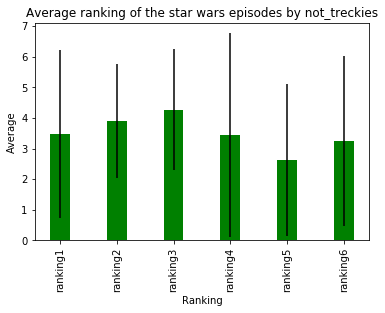

In [159]:
not_treckie_ranking_means = not_treckie.iloc[:,9:15].mean(axis=0)
not_treckie_ranking_variance = not_treckie.iloc[:,9:15].var(axis=0)
labels23_not_treckie = list(not_treckie.columns[9:15])
labels23_not_treckie
xticks23_not_treckie = np.arange(1,len(labels23_not_treckie)+1,1)
xticks23_not_treckie
width = 0.35   
plt.bar(xticks23_not_treckie, not_treckie_ranking_means, width, color='green', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by not_treckies")
plt.xticks(xticks23_not_treckie, labels23_not_treckie, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")
plt.show()

In [ ]:
Both treckies and not treckies have ranked 5 and 6 the highest.

Male and female

In [160]:
male = star_wars[star_wars['Gender']== "Male"]
female = star_wars[star_wars['Gender']== "Female"]

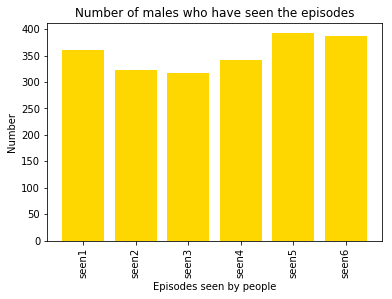

In [161]:
# values
male_seen_sum = male.iloc[:,3:9].sum()
male_seen_sum
# xticks
xticks_male_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_male_seen

# xtick labels
labels_male_seen = list(male.columns[3:9])
labels_male_seen

plt.bar(xticks_male_seen, male_seen_sum, color="gold")
plt.xticks(xticks_male_seen, labels_male_seen, rotation="vertical")
plt.title("Number of males who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

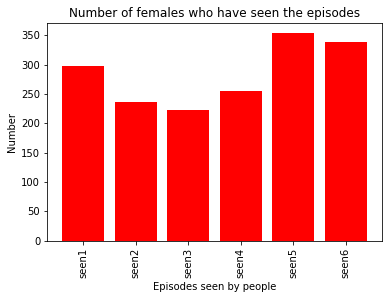

In [163]:
# values
female_seen_sum = female.iloc[:,3:9].sum()
female_seen_sum
# xticks
xticks_female_seen = [i + 1 for i,_ in enumerate(seen_sum)]
xticks_female_seen

# xtick labels
labels_female_seen = list(female.columns[3:9])
labels_female_seen

plt.bar(xticks_female_seen, female_seen_sum, color="red")
plt.xticks(xticks_female_seen, labels_female_seen, rotation="vertical")
plt.title("Number of females who have seen the episodes")
plt.xlabel("Episodes seen by people")
plt.ylabel("Number")
plt.show()

Male and females have seen the same episodes most often, but the differences withing females is greater.

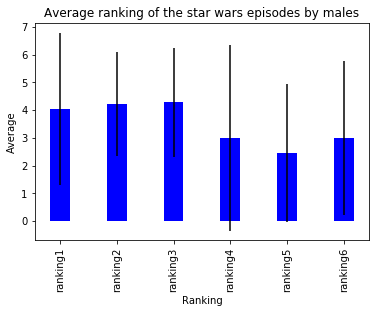

In [164]:
male_ranking_means = male.iloc[:,9:15].mean(axis=0)
male_ranking_variance = male.iloc[:,9:15].var(axis=0)
labels23_male = list(male.columns[9:15])
labels23_male
xticks23_male = np.arange(1,len(labels23_male)+1,1)
xticks23_male
width = 0.35   
plt.bar(xticks23_male, male_ranking_means, width, color='blue', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by males")
plt.xticks(xticks23_male, labels23_male, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")


plt.show()

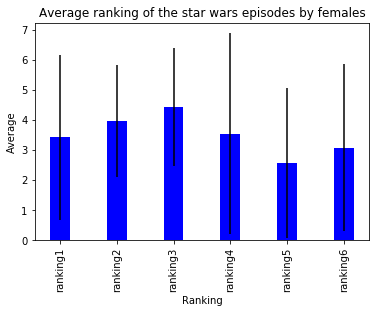

In [166]:
female_ranking_means = female.iloc[:,9:15].mean(axis=0)
female_ranking_variance = female.iloc[:,9:15].var(axis=0)
labels23_female = list(female.columns[9:15])
labels23_female
xticks23_female = np.arange(1,len(labels23_female)+1,1)
xticks23_female
width = 0.35   
plt.bar(xticks23_female, female_ranking_means, width, color='blue', yerr = ranking_variance)
plt.title("Average ranking of the star wars episodes by females")
plt.xticks(xticks23_female, labels23_female, rotation='vertical')
plt.xlabel("Ranking")
plt.ylabel("Average")


plt.show()

Both female and male have ranke 4,5,6 the highest, but the ranking by males is more clearly.